In [1]:
import json
import re
import pandas as pd
import numpy as np
from rdkit import Chem
from tqdm import tqdm
from matchms.importing import load_from_mgf
from matchms.exporting import save_as_mgf

In [2]:
df_kai = pd.read_csv('../../data/filtered_gym_fixed.tsv', sep='\t')
df_kai = df_kai.drop(columns=['fold', 'simulation_challenge'])
df_kai

/var/folders/73/x57b4d9x09qbcqjjd5ccz_6r0000gn/T/ipykernel_5602/300448890.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_kai = pd.read_csv('../../data/filtered_gym_fixed.tsv', sep='\t')


,mzs,intensities,smiles,inchi,inchikey,precursor_mz,adduct,parent_mass,formula,precursor_formula,instrument_type,collision_energy,identifier
0,"91.0542,125.0233,154.0499,155.0577,185.0961,20...","0.24524524524524524,1.0,0.08008008008008008,0....",CC(=O)NC(CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"30.0 (normalized=False, ramped=False)",MassSpecGymID0000001
1,"91.0542,125.0233,155.0577,185.0961,229.0859,24...","0.0990990990990991,0.28128128128128127,0.04004...",CC(=O)NC(CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"20.0 (normalized=False, ramped=False)",MassSpecGymID0000002
2,"69.0343,91.0542,125.0233,127.039,153.0699,154....","0.03403403403403404,0.31431431431431434,1.0,0....",CC(=O)NC(CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"40.0 (normalized=False, ramped=False)",MassSpecGymID0000003
3,"69.0343,91.0542,110.06,111.0441,112.0393,120.0...","0.17917917917917917,0.47347347347347346,0.0380...",CC(=O)NC(CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"55.0 (normalized=False, ramped=False)",MassSpecGymID0000004
4,"91.0542,125.0233,185.0961,229.0859,246.1125,28...","0.07807807807807808,0.1841841841841842,0.03503...",CC(=O)NC(CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC,InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"10.0 (normalized=False, ramped=False)",MassSpecGymID0000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239306,"77.5606,85.238739,152.079361,156.231537,189.96...","0.00022242662384734551,0.0007871876908597226,0...",CCC(C)CCCCC(=O)NC(CCN)C(=O)NC(C(C)O)C(=O)NC(CC...,InChI=1S/C56H98N16O13/c1-7-32(4)13-11-12-16-44...,WQVJHHACXVLGBL,1225.7400,[M+Na]+,1202.750782,C56H98N16O13,C56H98N16NaO13,QTOF,NaN,MassSpecGymID0414170
239307,"72.043739,86.060242,98.058304,99.0634,126.0537...","0.0019527744563354998,0.0016939927337585416,0....",CC1(C2CC3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C(C=CC(=C...,InChI=1S/C22H23ClN2O8/c1-21(32)7-6-8-15(25(2)3...,DHPRQBPJLMKORJ,479.1230,[M+H]+,478.115724,C22H23ClN2O8,C22H24ClN2O8,QTOF,NaN,MassSpecGymID0414171
239308,"72.080132,102.233917,113.082344,113.121498,114...","0.021173783463613503,0.007516001055215398,0.03...",CC(C1CCC(C(O1)OC2C(CC(C(C2O)OC3C(C(C(CO3)(C)O)...,InChI=1S/C21H43N5O7/c1-9(25-3)13-6-5-10(22)19(...,CEAZRRDELHUEMR,478.3250,[M+H]+,477.317724,C21H43N5O7,C21H44N5O7,QTOF,NaN,MassSpecGymID0414172
239309,"55.053627,56.455425,58.065819,67.053543,82.065...","0.031731527156456024,0.017878400151027027,0.07...",CC(C1CCC(C(O1)OC2C(CC(C(C2O)OC3C(C(C(CO3)(C)O)...,InChI=1S/C21H43N5O7/c1-9(25-3)13-6-5-10(22)19(...,CEAZRRDELHUEMR,478.3250,[M+H]+,477.317724,C21H43N5O7,C21H44N5O7,QTOF,NaN,MassSpecGymID0414173


### Standardize SMILES

31555


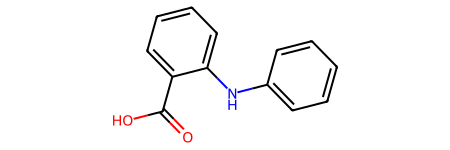

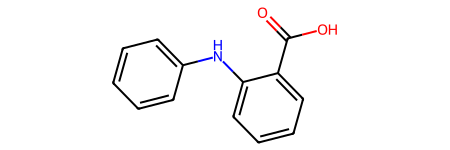

In [3]:
with open('../../data/all_smiles.json', 'r') as f:
    smiles_in = json.load(f)
print(len(smiles_in))
with open('../../data/all_smiles_standardized_mces/all_smiles_standardized.json', 'r') as f:
    smiles_out = json.load(f)
len(smiles_out)

std_smiles_map = {}
for k, v in smiles_in.items():
    for i, s in enumerate(v):
        std_smiles_map[s] = smiles_out[k][i]
len(std_smiles_map)
s = list(std_smiles_map.keys())[13112]
display(Chem.MolFromSmiles(s))
display(Chem.MolFromSmiles(std_smiles_map[s]))

In [4]:
spectra = list(load_from_mgf('../../data/cleaned_libraries_4.mgf'))
print(len(spectra))
ids_to_niek_smiles = {s.metadata['identifier']: s.metadata['smiles'] for s in tqdm(spectra)}
spectra[0].metadata

414174


100%|██████████| 414174/414174 [00:17<00:00, 23530.25it/s]


{'smiles': 'CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC',
 'inchi': 'InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5-7-12)15-9-13(20-2)10-16(19)21-15/h3-7,9-10,14H,8H2,1-2H3,(H,17,18)/t14-/m0/s1',
 'inchikey': 'VFMQMACUYWGDOJ-AWEZNQCLSA-N',
 'precursor_mz': 288.1225,
 'adduct': '[M+H]+',
 'parent_mass': '287.115224',
 'formula': 'C16H17NO4',
 'precursor_formula': 'C16H18NO4',
 'instrument_type': 'LC-ESI-ITFT',
 'collision_energy': '30(NCE)',
 'identifier': 'MassSpecGymID0000001'}

In [6]:
def std_smi(i):
    return std_smiles_map[ids_to_niek_smiles[i]]
df_kai['std_smiles'] = df_kai['identifier'].apply(std_smi)

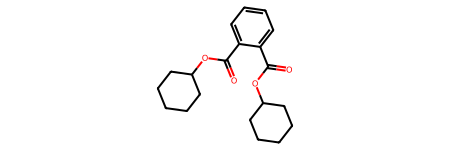

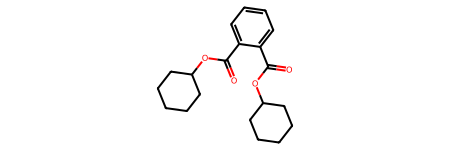

In [16]:
i = 36369
df_kai[['std_smiles', 'smiles']]
display(Chem.MolFromSmiles(df_kai['smiles'][i]))
display(Chem.MolFromSmiles(df_kai['std_smiles'][i]))

In [17]:
df_kai = df_kai.drop(columns=['smiles']).rename(columns={'std_smiles': 'smiles'})
df_kai

,mzs,intensities,inchi,inchikey,precursor_mz,adduct,parent_mass,formula,precursor_formula,instrument_type,collision_energy,identifier,smiles
0,"91.0542,125.0233,154.0499,155.0577,185.0961,20...","0.24524524524524524,1.0,0.08008008008008008,0....",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"30.0 (normalized=False, ramped=False)",MassSpecGymID0000001,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC
1,"91.0542,125.0233,155.0577,185.0961,229.0859,24...","0.0990990990990991,0.28128128128128127,0.04004...",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"20.0 (normalized=False, ramped=False)",MassSpecGymID0000002,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC
2,"69.0343,91.0542,125.0233,127.039,153.0699,154....","0.03403403403403404,0.31431431431431434,1.0,0....",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"40.0 (normalized=False, ramped=False)",MassSpecGymID0000003,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC
3,"69.0343,91.0542,110.06,111.0441,112.0393,120.0...","0.17917917917917917,0.47347347347347346,0.0380...",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"55.0 (normalized=False, ramped=False)",MassSpecGymID0000004,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC
4,"91.0542,125.0233,185.0961,229.0859,246.1125,28...","0.07807807807807808,0.1841841841841842,0.03503...",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"10.0 (normalized=False, ramped=False)",MassSpecGymID0000005,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239306,"77.5606,85.238739,152.079361,156.231537,189.96...","0.00022242662384734551,0.0007871876908597226,0...",InChI=1S/C56H98N16O13/c1-7-32(4)13-11-12-16-44...,WQVJHHACXVLGBL,1225.7400,[M+Na]+,1202.750782,C56H98N16O13,C56H98N16NaO13,QTOF,NaN,MassSpecGymID0414170,CCC(C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@@H]([C@@H]...
239307,"72.043739,86.060242,98.058304,99.0634,126.0537...","0.0019527744563354998,0.0016939927337585416,0....",InChI=1S/C22H23ClN2O8/c1-21(32)7-6-8-15(25(2)3...,DHPRQBPJLMKORJ,479.1230,[M+H]+,478.115724,C22H23ClN2O8,C22H24ClN2O8,QTOF,NaN,MassSpecGymID0414171,C[C@@]1([C@H]2C[C@H]3[C@@H](C(=O)C(=C([C@]3(C(...
239308,"72.080132,102.233917,113.082344,113.121498,114...","0.021173783463613503,0.007516001055215398,0.03...",InChI=1S/C21H43N5O7/c1-9(25-3)13-6-5-10(22)19(...,CEAZRRDELHUEMR,478.3250,[M+H]+,477.317724,C21H43N5O7,C21H44N5O7,QTOF,NaN,MassSpecGymID0414172,C[C@H]([C@@H]1CC[C@H]([C@H](O1)O[C@@H]2[C@H](C...
239309,"55.053627,56.455425,58.065819,67.053543,82.065...","0.031731527156456024,0.017878400151027027,0.07...",InChI=1S/C21H43N5O7/c1-9(25-3)13-6-5-10(22)19(...,CEAZRRDELHUEMR,478.3250,[M+H]+,477.317724,C21H43N5O7,C21H44N5O7,QTOF,NaN,MassSpecGymID0414173,C[C@H]([C@@H]1CC[C@H]([C@H](O1)O[C@@H]2[C@H](C...


### Standardize collision energies

In [18]:
# Code from Adamo: https://github.com/pluskal-lab/MassSpecGym/blob/8c6514cbbc2804ff57b5e9e39fe010a9d2ca310b/notebooks/simulation_preproc.ipynb.

def parse_ce_str(ce_str):

    ce_str = str(ce_str)
    normal_regex = re.compile(r'\d+(\.\d+)?')
    # ramped_regex = re.compile(r'\d+(\.\d+)?-\d+(\.\d+)?')
    ramped_regex = re.compile(r'\d+(\.\d+)?(V)?(-|->)\d+(\.\d+)?(V)?')
    ce_str = ce_str.split(";")[-1]
    try:
        if "%" in ce_str:
            normalized = True
        else:
            normalized = False
        if "-" in ce_str or "Ramp" in ce_str or "RAMP" in ce_str or "->" in ce_str:
            ramped = True
            ramped_ce = ramped_regex.search(ce_str).group(0)
            if "->" in ramped_ce:
                min_ce, max_ce = ramped_ce.split("->")
            else:
                min_ce, max_ce = ramped_ce.split("-")
            ce = 0.5*float(min_ce.strip("V")) + 0.5*float(max_ce.strip("V"))
        else:
            ramped = False
            ce = normal_regex.search(ce_str).group(0)
            ce = float(ce)
    except:
        ce = np.nan
        normalized = False
        ramped = False
    return ce, normalized, ramped

def convert_nce(row):
    # assumes charge factor of 1
    if row["normalized"]:
        nce = row["ce"]
        ace = (nce * row["precursor_mz"] * 1.) / 500.
    else:
        ace = row["ce"]
    return ace

In [19]:
print(df_kai['collision_energy'].isna().sum())
df_kai["ce"], df_kai["normalized"], df_kai["ramped"] = zip(*df_kai["collision_energy"].apply(parse_ce_str))
df_kai["ce"] = df_kai.apply(convert_nce, axis=1)
print(df_kai['ce'].isna().sum())
df_kai["collision_energy"] = df_kai.apply(
    lambda row: f'{row["ce"]} (normalized={row["normalized"]}, ramped={row["ramped"]})'
                if not pd.isnull(row["ce"])
                else row["ce"],
    axis=1
)
df_kai = df_kai.drop(columns=["ce", "normalized", "ramped"])
df_kai

116828
116828


,mzs,intensities,inchi,inchikey,precursor_mz,adduct,parent_mass,formula,precursor_formula,instrument_type,collision_energy,identifier,smiles
0,"91.0542,125.0233,154.0499,155.0577,185.0961,20...","0.24524524524524524,1.0,0.08008008008008008,0....",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"30.0 (normalized=False, ramped=False)",MassSpecGymID0000001,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC
1,"91.0542,125.0233,155.0577,185.0961,229.0859,24...","0.0990990990990991,0.28128128128128127,0.04004...",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"20.0 (normalized=False, ramped=False)",MassSpecGymID0000002,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC
2,"69.0343,91.0542,125.0233,127.039,153.0699,154....","0.03403403403403404,0.31431431431431434,1.0,0....",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"40.0 (normalized=False, ramped=False)",MassSpecGymID0000003,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC
3,"69.0343,91.0542,110.06,111.0441,112.0393,120.0...","0.17917917917917917,0.47347347347347346,0.0380...",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"55.0 (normalized=False, ramped=False)",MassSpecGymID0000004,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC
4,"91.0542,125.0233,185.0961,229.0859,246.1125,28...","0.07807807807807808,0.1841841841841842,0.03503...",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"10.0 (normalized=False, ramped=False)",MassSpecGymID0000005,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239306,"77.5606,85.238739,152.079361,156.231537,189.96...","0.00022242662384734551,0.0007871876908597226,0...",InChI=1S/C56H98N16O13/c1-7-32(4)13-11-12-16-44...,WQVJHHACXVLGBL,1225.7400,[M+Na]+,1202.750782,C56H98N16O13,C56H98N16NaO13,QTOF,NaN,MassSpecGymID0414170,CCC(C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@@H]([C@@H]...
239307,"72.043739,86.060242,98.058304,99.0634,126.0537...","0.0019527744563354998,0.0016939927337585416,0....",InChI=1S/C22H23ClN2O8/c1-21(32)7-6-8-15(25(2)3...,DHPRQBPJLMKORJ,479.1230,[M+H]+,478.115724,C22H23ClN2O8,C22H24ClN2O8,QTOF,NaN,MassSpecGymID0414171,C[C@@]1([C@H]2C[C@H]3[C@@H](C(=O)C(=C([C@]3(C(...
239308,"72.080132,102.233917,113.082344,113.121498,114...","0.021173783463613503,0.007516001055215398,0.03...",InChI=1S/C21H43N5O7/c1-9(25-3)13-6-5-10(22)19(...,CEAZRRDELHUEMR,478.3250,[M+H]+,477.317724,C21H43N5O7,C21H44N5O7,QTOF,NaN,MassSpecGymID0414172,C[C@H]([C@@H]1CC[C@H]([C@H](O1)O[C@@H]2[C@H](C...
239309,"55.053627,56.455425,58.065819,67.053543,82.065...","0.031731527156456024,0.017878400151027027,0.07...",InChI=1S/C21H43N5O7/c1-9(25-3)13-6-5-10(22)19(...,CEAZRRDELHUEMR,478.3250,[M+H]+,477.317724,C21H43N5O7,C21H44N5O7,QTOF,NaN,MassSpecGymID0414173,C[C@H]([C@@H]1CC[C@H]([C@H](O1)O[C@@H]2[C@H](C...


### Standardize instruments

In [20]:
def standardize_instrument_type(instr):
    if pd.isnull(instr):
        return instr
    if instr.startswith("LC-"):
        instr = instr[3:]
    if instr.startswith("ESI-"):
        instr = instr[4:]
    if instr.startswith("Q-"):
        instr = instr[2:]
    if instr.endswith("/MS"):
        instr = instr[:-3]
    if instr in ['Q Exactive Focus Hybrid Quadrupole Orbitrap Mass Spectrometer (Thermo Fisher Scientific)', 'QEHF']:
        instr = 'Orbitrap'
    if instr in ['TOF', 'ITTOF']:
        instr = 'QTOF'
    if instr in ['FT']:
        instr = 'QFT'
    return instr
df_kai['instrument_type'] = df_kai['instrument_type'].apply(standardize_instrument_type)
df_kai['instrument_type'].value_counts()

instrument_type
ITFT        117641
QTOF         54461
Orbitrap     38841
QFT          22928
Name: count, dtype: int64

### Drop empty spectra

In [23]:
print(len(df_kai))
df_kai = df_kai[df_kai['mzs'].apply(lambda x: len(x) != 0)]
print(len(df_kai))

239311
239311


<Axes: >

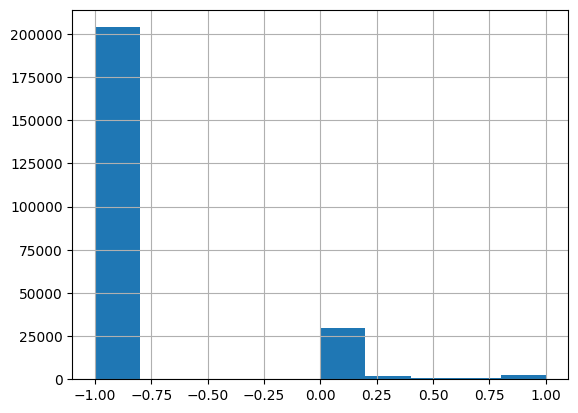

In [74]:
def max_intensity_above_prec_mz(row):
    mzs = np.array(list(map(float, row['mzs'].split(','))))
    intensities = np.array(list(map(float, row['intensities'].split(','))))
    intensities_above = intensities[mzs > row['precursor_mz'] + 3]
    if len(intensities_above) == 0:
        return -1
    return max(intensities_above)
df_kai.apply(max_intensity_above_prec_mz, axis=1).hist()

In [76]:
print(len(df_kai), df_kai['inchikey'].apply(lambda x: x.split('-')[0]).nunique())
df_kai = df_kai[df_kai.apply(max_intensity_above_prec_mz, axis=1) <= 0.2]
print(len(df_kai), df_kai['inchikey'].apply(lambda x: x.split('-')[0]).nunique())

239311 29386
233446 29300


In [77]:
df_kai

,mzs,intensities,inchi,inchikey,precursor_mz,adduct,parent_mass,formula,precursor_formula,instrument_type,collision_energy,identifier,smiles
0,"91.0542,125.0233,154.0499,155.0577,185.0961,20...","0.24524524524524524,1.0,0.08008008008008008,0....",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"30.0 (normalized=False, ramped=False)",MassSpecGymID0000001,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC
1,"91.0542,125.0233,155.0577,185.0961,229.0859,24...","0.0990990990990991,0.28128128128128127,0.04004...",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"20.0 (normalized=False, ramped=False)",MassSpecGymID0000002,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC
2,"69.0343,91.0542,125.0233,127.039,153.0699,154....","0.03403403403403404,0.31431431431431434,1.0,0....",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"40.0 (normalized=False, ramped=False)",MassSpecGymID0000003,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC
3,"69.0343,91.0542,110.06,111.0441,112.0393,120.0...","0.17917917917917917,0.47347347347347346,0.0380...",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"55.0 (normalized=False, ramped=False)",MassSpecGymID0000004,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC
4,"91.0542,125.0233,185.0961,229.0859,246.1125,28...","0.07807807807807808,0.1841841841841842,0.03503...",InChI=1S/C16H17NO4/c1-11(18)17-14(8-12-6-4-3-5...,VFMQMACUYWGDOJ,288.1225,[M+H]+,287.115224,C16H17NO4,C16H18NO4,ITFT,"10.0 (normalized=False, ramped=False)",MassSpecGymID0000005,CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239306,"77.5606,85.238739,152.079361,156.231537,189.96...","0.00022242662384734551,0.0007871876908597226,0...",InChI=1S/C56H98N16O13/c1-7-32(4)13-11-12-16-44...,WQVJHHACXVLGBL,1225.7400,[M+Na]+,1202.750782,C56H98N16O13,C56H98N16NaO13,QTOF,NaN,MassSpecGymID0414170,CCC(C)CCCCC(=O)N[C@@H](CCN)C(=O)N[C@@H]([C@@H]...
239307,"72.043739,86.060242,98.058304,99.0634,126.0537...","0.0019527744563354998,0.0016939927337585416,0....",InChI=1S/C22H23ClN2O8/c1-21(32)7-6-8-15(25(2)3...,DHPRQBPJLMKORJ,479.1230,[M+H]+,478.115724,C22H23ClN2O8,C22H24ClN2O8,QTOF,NaN,MassSpecGymID0414171,C[C@@]1([C@H]2C[C@H]3[C@@H](C(=O)C(=C([C@]3(C(...
239308,"72.080132,102.233917,113.082344,113.121498,114...","0.021173783463613503,0.007516001055215398,0.03...",InChI=1S/C21H43N5O7/c1-9(25-3)13-6-5-10(22)19(...,CEAZRRDELHUEMR,478.3250,[M+H]+,477.317724,C21H43N5O7,C21H44N5O7,QTOF,NaN,MassSpecGymID0414172,C[C@H]([C@@H]1CC[C@H]([C@H](O1)O[C@@H]2[C@H](C...
239309,"55.053627,56.455425,58.065819,67.053543,82.065...","0.031731527156456024,0.017878400151027027,0.07...",InChI=1S/C21H43N5O7/c1-9(25-3)13-6-5-10(22)19(...,CEAZRRDELHUEMR,478.3250,[M+H]+,477.317724,C21H43N5O7,C21H44N5O7,QTOF,NaN,MassSpecGymID0414173,C[C@H]([C@@H]1CC[C@H]([C@H](O1)O[C@@H]2[C@H](C...


### Double-check the validity of the SMILES standardization in the final `.tsv`

355.19361442
356.201
[M+H]+


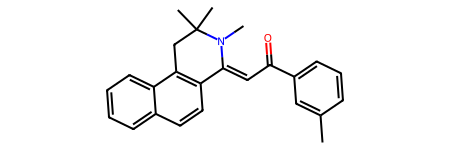

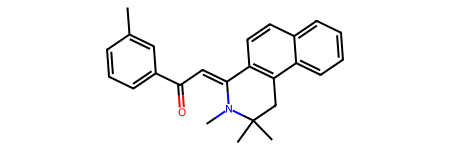

In [84]:
from rdkit.Chem.Descriptors import ExactMolWt
df_ = df_kai.sample(1)
i = 0
print(ExactMolWt(Chem.MolFromSmiles(df_['smiles'].values[i])))
print(df_['precursor_mz'].iloc[i])
print(df_['adduct'].iloc[i])
display(Chem.MolFromInchi(df_['inchi'].values[i]))
display(Chem.MolFromSmiles(df_['smiles'].values[i]))

In [86]:
df_kai.to_csv('../../data/data/MassSpecGym.tsv', index=False, sep='\t')

### Convert to `.mgf`

In [87]:
# TODO